<div style="text-align:center"><img src="https://sp-ao.shortpixel.ai/client/to_avif,q_glossy,ret_img,w_1024/https://pianalytix.com/wp-content/uploads/2020/11/Titanic-Survival-Prediction-using-Machine-Learning-1024x427.jpg" width="900" /></div>

<h1 style="color:Black;font-size:28px;font-family:Helvetica;text-align:left;"><u>Brief Background</u></h1>
<p style="color:Black;font-size:16px;font-family:Georgia;text-align:left;">On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of <b>1502</b> out of <b>2224</b> passengers and crew.While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.<br>
</p>

<h1 style="color:Black;font-size:28px;font-family:Helvetica;text-align:left;"><u>Project Topic</u></h1>
<p style="color:Black;font-size:16px;font-family:Georgia;text-align:left;">In this project, I will be collecting, wrangling data and conducting Exploratory Data Analysis on the titanic dataset. The goal is to build a predictive model that will help us answer <b>" What sorts of people were more likely to survive? "</b> using passenger data(ie name, age, gender, socio-economic class, etc). As the target variable is discrete values(0 - died, 1 - survived), the problem is that of a simple binary classification and I will be using a set of models from the supervised machine learning category. We are doing supervised machine learning, because we are training our algorithm by presenting it with a set of features and their corresponding target. We then hope to present it a new subset from the same dataset and have similar results in prediction accuracy. 
</p>

<h1 style="color:Black;font-size:28px;font-family:Helvetica;text-align:left;"><u>Data Source</u></h1>
<p style="color:Black;font-size:16px;font-family:Georgia;text-align:left;">
The data is well described on the kaggle site.The dataset can be also be located in my Github repository.
Please click the below link to read detailed information about the dataset on the kaggle website.<br>  
<b>Note:</b> I will just be using the training dataset for our project and splitting it into training and test 
</p> 

[Click Here](https://www.kaggle.com/c/titanic/data) 


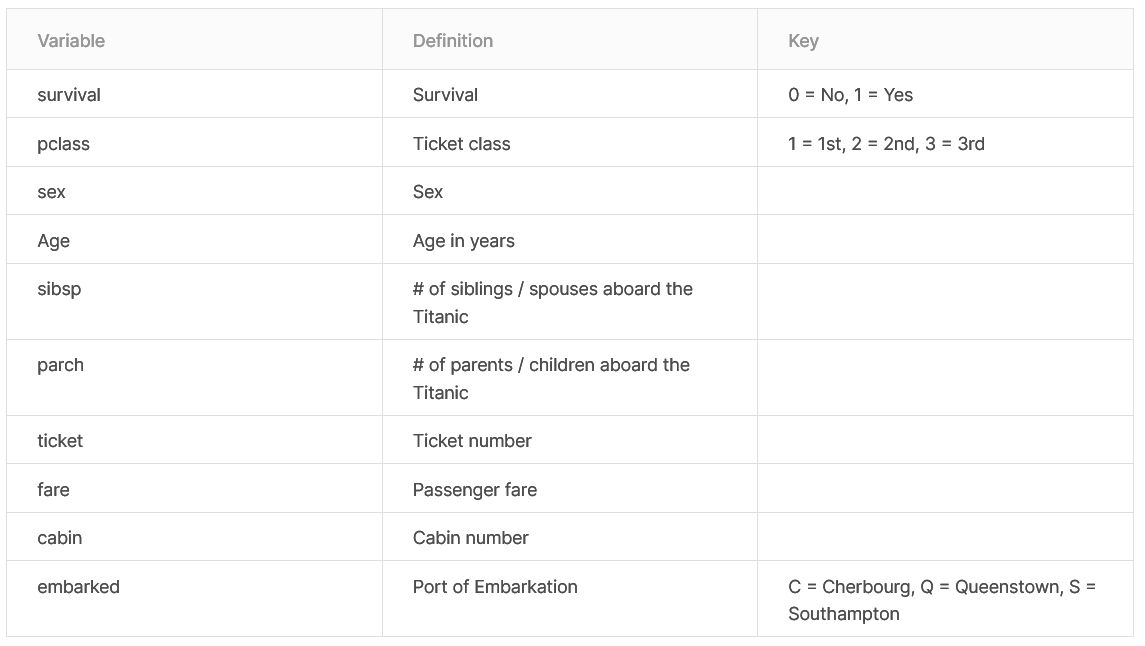

<div style="text-align:center"><img src="https://assets-global.website-files.com/5deb974b5176872b2c106aba/5e3c3add630a1585791ff8a9_4dda7c5dc3564bce88dfa5114c53a774.png" width="500" /></div>

<h1 style="color:Black;font-size:28px;font-family:Helvetica;text-align:left;"><u>Project Workflow</u></h1>

* [Import The Libraries](#1)
* [Load & Read The Dataset](#2)
* [Dataset Description](#3)
* [Count Of Unique Values In Each Column](#4)
* [Data Imputation](#5)
* [Dropping The Redundant Features](#6)
* [Finding The Duplicate Records](#7)
* [Statistics On Numerical And Categorical Features](#8)               
* [Statistical Analysis by Feature](#9)
* [Auto EDA With Panda Profile Report](#10)
* [Feature Engineering](#11)
* [Correlation Between The Features](#12)
* [Balancing The Dataset](#13)
* [Model Building](#14)
* [Hyper Parameter Tunning](#15)
* [Train Model after Tunning](#16)
* [Feature Importance](#17)
* [Model Evaluation](#18)
* [Discussion & Conclusion](#19)

<a id="1"></a>
<h1 style="color:Black;font-size:28px;font-family:Helvetica;text-align:left;"><u>1. Import The Libraries</u></h1>


In [82]:
#IMPORT THE LIBRARIES....
import numpy as np # linear algebra....
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)....
from matplotlib import pyplot as plt #Visualization of the data....
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

from IPython.core.interactiveshell import InteractiveShell 
InteractiveShell.ast_node_interactivity = "all"

#Libraries to visualize the dataset
import matplotlib as mpl
import plotly.graph_objs as go
import matplotlib.patches as mpatches
import seaborn as sns
import plotly.express as px
from plotly import tools
from plotly.subplots import make_subplots
from plotly.offline import iplot

#Libraries to AutoEDA
import pandas_profiling as pp
from pandas_profiling import ProfileReport

#Useful machine learning libraries....
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier ,AdaBoostClassifier,BaggingClassifier,ExtraTreesClassifier,GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve ,KFold
from sklearn.metrics import roc_curve,accuracy_score,f1_score,auc,confusion_matrix,roc_auc_score,plot_confusion_matrix
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.tree import DecisionTreeClassifier

In [83]:
%matplotlib inline

<a id="2"></a>
<h1 style="color:Black;font-size:28px;font-family:Helvetica;text-align:left;"><u>2. Load & Read The Dataset</u></h1>

In [84]:
df=pd.read_csv("https://raw.githubusercontent.com/visi2021/Machine-Learning/main/train.csv")
df.head().style.background_gradient(cmap='rocket')

In [85]:
#Use this copy to run the Panda profile report
dfeda=df.copy()

<a id="3"></a>
<h1 style="color:Black;font-size:28px;font-family:Helvetica;text-align:left;"><u>3. Dataset Description</u></h1>

<p style="color:Black;font-size:16px;font-family:Georgia;text-align:left;">To begin this step, we first import our data. Next we use several dataframe function, to get a quick overview of variable datatypes (i.e. qualitative vs quantitative).</p>

<p style="color:Black;font-size:16px;font-family:Georgia;text-align:left;">
    1. The Survived variable is our outcome or dependent variable. It is a binary nominal datatype of 1 for survived and 0 for did 
       not  survive. All other variables are potential predictor or independent variables. It's important to note, more predictor 
       variables do not make a better model, but the right variables.<br>
    2. The PassengerID and Ticket variables are assumed to be random unique identifiers, that have no impact on the outcome variable. 
       Thus, they will be excluded from analysis.<br>
    3. The Pclass variable is an ordinal datatype for the ticket class, a proxy for socio-economic status (SES), representing 
       1 = upper class, 2 = middle class, and 3 = lower class.<br>
    4. The Name variable is a nominal datatype. It could be used in feature engineering to derive the gender from title, 
       family size from surname, and SES from titles like doctor or master. Since these variables already exist, we'll make 
       use of it to see if title, like master, makes a difference.<br>
    5. The Sex and Embarked variables are a nominal datatype. They will be converted to dummy variables for mathematical calculations.
    6. The Age and Fare variable are continuous quantitative datatypes.<br>
    7. The SibSp represents number of related siblings/spouse aboard and Parch represents number of related parents/children aboard. 
       Both are discrete quantitative datatypes. This can be used for feature engineering to create a family size and is alone variable.<br>
    8. The Cabin variable is a nominal datatype that can be used in feature engineering for approximate position on ship when the 
       incident occurred and SES from deck levels. However, since there are many null values, it does not add value and thus is 
       excluded from analysis.
</p>

In [86]:
#The shape of the dataset.....
df.shape

(891, 12)

In [87]:
# list of numerical variables............
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']
print('Number of numerical variables: ', len(numerical_features))
print('-'*100)
print('Numerical Variables Column: ',numerical_features)

Number of numerical variables:  7
----------------------------------------------------------------------------------------------------
Numerical Variables Column:  ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


In [88]:
# list of categorical variables............
cat_features = [feature for feature in df.columns if df[feature].dtypes == 'O']
print('Number of categorical variables: ', len(cat_features))
print('-'*80)
print('Categorical variables column name:',cat_features)

Number of categorical variables:  5
--------------------------------------------------------------------------------
Categorical variables column name: ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']


In [89]:
#The dimensions of the dataset.......
df.ndim

2

In [90]:
#index of the dataset
df.index

RangeIndex(start=0, stop=891, step=1)

In [91]:
#The size of the dataset.......
df.size

10692

In [92]:
def memory_use():
    print('\033[1m'+'Memory used by all colomns in bytes'+'\033[0m')

In [93]:
k = df.memory_usage()
print(k,'bytes'+'\n')

Index           128
PassengerId    7128
Survived       7128
Pclass         7128
Name           7128
Sex            7128
Age            7128
SibSp          7128
Parch          7128
Ticket         7128
Fare           7128
Cabin          7128
Embarked       7128
dtype: int64 bytes



In [94]:
#The Information of the Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<a id="4"></a>
<h1 style="color:Black;font-size:28px;font-family:Helvetica;text-align:left;"><u>4. Count Of Unique Values In Each Column</u></h1>

In [95]:
from IPython.core.display import HTML
def multi_table(table_list):
    ''' Accepts a list of IpyTable objects and returns a table which contains each IpyTable in a cell
    '''
    return HTML(
        '<table><tr style="background-color:white;">' + 
        ''.join(['<td>' + table._repr_html_() + '</td>' for table in table_list]) +
        '</tr></table>')

In [96]:
df_nunique = {var: pd.DataFrame(df[var].value_counts()) 
              for var in {'Survived', 'Pclass', 'Sex','SibSp','Parch','Embarked'}}
multi_table([df_nunique['Survived'].style.background_gradient(cmap='rocket'),df_nunique['SibSp'].style.background_gradient(cmap='rocket'),df_nunique['Parch'].style.background_gradient(cmap='rocket'),df_nunique['Embarked'].style.background_gradient(cmap='rocket')])

<a id="5"></a>
<h1 style="color:Black;font-size:28px;font-family:Helvetica;text-align:left;"><u>5. Data Imputation</u></h1>

<AxesSubplot:>

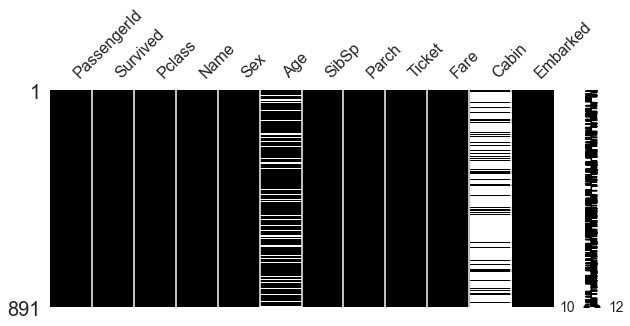

In [97]:
#Visualizing the missing values
import missingno as mn
mn.matrix(df,color=(0,0,0),figsize = (10,4))

In [98]:
# Find the percentage of missing values - DataFrame..... 
def missing_data(df):
    total = df.isnull().sum().sort_values(ascending = False)
    Percentage = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([total, Percentage], axis=1, keys=['Total', 'Percentage'])
missing_data(df)[missing_data(df)["Percentage"]!=0].style.background_gradient(cmap='rocket')

<h1 style="color:Black;font-size:18px;font-family:Helvetica;text-align:left;">📝Observations:-</h1>
<p style="color:Black;font-size:16px;font-family:Georgia;text-align:left;">
1. We can see that <b>"Cabin"</b> feature has more than 40% of missing values. So it makes sense to delete this feature.<br>
2. <b>"Age"</b> and <b>"Embarked"</b> feature have very less percentage of missing values.<br>
3. <b>"Age"</b> is a numerical feature and has some outliers, so I can use the median technique to fill the NaN values.<br>
4. <b>"Embarked"</b> is a categorical feature, so I can use the mode technique to fill the NaN values.
</p>

In [99]:
#Fill the missing values with the median and mode values 
df['Embarked']=df['Embarked'].fillna(df['Embarked'].mode()[0])
df['Age']=df['Age'].fillna(df['Age'].median())

<a id="6"></a>
<h1 style="color:Black;font-size:28px;font-family:Helvetica;text-align:left;"><u>6. Dropping The Redundant Features</u></h1>

In [100]:
df.drop(columns = ['Cabin','PassengerId'],axis = 1,inplace = True)

<a id="7"></a>
<h1 style="color:Black;font-size:28px;font-family:Helvetica;text-align:left;"><u>7. Finding The Duplicate Records</u></h1>

In [101]:
#Finding the duplicates records from the dataset...
df[df.duplicated()]

Empty DataFrame
Columns: [Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Embarked]
Index: []

<a id="8"></a>
<h1 style="color:Black;font-size:28px;font-family:Helvetica;text-align:left;"><u>8. Statistics On Numerical And Categorical Features</u></h1>

In [102]:
# Statistics on Numerical data
round(df.describe(exclude = 'object'), 2).T.style.background_gradient(cmap='rocket')

<h1 style="color:Black;font-size:18px;font-family:Helvetica;text-align:Left;">📝Observations:-</h1>
<p style="color:Black;font-size:16px;font-family:Georgia;text-align:left;">
1. Ages range from 0.4 to 80.<br>
2. Survived has only two values {0,1}.<br>
3. Fare ranges from 0 to 514.<br>
4. Parch has values -{0,1,2,3,4,5,6}.<br>
5. SibSp has values -{0,1,2,3,4,5,6,7,8}.<br>
6. Pclass has values -{1,2,3}.<br>
</p>

In [103]:
# Statistics on Categorical data
round(df.describe(exclude = ['float', 'int64']),2).T.style.set_properties(**{"background-color": "#ffcc80","color": "Black", "border-color": "Black","font-size":"10pt",'width': 130})

<h1 style="color:Black;font-size:18px;font-family:Helvetica;text-align:Left;">📝Observations:-</h1>
<p style="color:Black;font-size:16px;font-family:Georgia;text-align:left;">
1. Names are unique across the dataset (count=unique=891).<br>
2. Sex variable has two possible values with 65% male (top=male, freq=577/count=891).<br>
3. Embarked has three possible values with port 'S' used by most passengers (top=S).<br>
4. Ticket feature has high ratio (22%) of duplicate values (unique=681).<br>
</p>

<a id="9"></a>
<h1 style="color:Black;font-size:28px;font-family:Helvetica;text-align:left;"><u>9. Statistical Analysis by Feature</u></h1>
<h1 style="color:Black;font-size:18px;font-family:Helvetica;text-align:left;">9.1 Feature - Sex</h1>

In [104]:
sns.set(style='darkgrid')
colors = px.colors.sequential.Oryel
fig = make_subplots(rows=1,cols=2,
                    subplot_titles=('Countplot',
                                    'Percentages'),
                    specs=[[{"type": "xy"},
                            {'type':'domain'}]])
a=fig.add_trace(go.Bar(y = df['Sex'].value_counts().values.tolist(), 
                      x = df['Sex'].value_counts().index, 
                      text=df['Sex'].value_counts().values.tolist(),
              textfont=dict(size=15),
                      textposition = 'outside',
                      showlegend=False,
              marker = dict(color = colors,
                            line_color = 'black',
                            line_width=3)),row = 1,col = 1)

b=fig.add_trace((go.Pie(labels=df['Sex'].value_counts().keys(),
                             values=df['Sex'].value_counts().values,textfont = dict(size = 16),
                     hole = .4,
                     marker=dict(colors=colors,
                            line_color = 'black',
                            line_width=3),
                     textinfo='label+percent',
                     hoverinfo='label')), row = 1, col = 2)
#Changing plot & figure background 
fig.update_layout(
                    paper_bgcolor= '#ffffff',
                    plot_bgcolor= '#ffffff',
                    title=dict(text = "Distribution Of Sex",x=0.5,y=0.95),
                    title_font_size=28,font_family="Helvetica"
                  )

In [105]:
df[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False).style.background_gradient(cmap='rocket')

In [106]:
fig = px.histogram(df, x="Sex", color ="Survived", pattern_shape="Survived",
                   template='plotly_white', barmode='group',color_discrete_sequence={
                0: "#e3d092",
                1: "#ffcc80"})
fig.update_layout(bargap=0.2 ,paper_bgcolor= '#ffffff',
                    plot_bgcolor= '#ffffff',
                    title=dict(text = "Analyze - Sex & Survived",x=0.5,y=0.95),
                    title_font_size=28,font_family="Helvetica")

<h1 style="color:Black;font-size:18px;font-family:Helvetica;text-align:left;">📝Observations:-</h1>
<p style="color:Black;font-size:16px;font-family:Georgia;text-align:left;">
1. The distribution chart confirms that we have a higher no. of <b>"Males"</b> than <b>"Females"</b> in the data.<br>
2. After analyzing - Sex & Survived confirms <b>"Females"</b> are more likely to survive than <b>"Males"</b>.<br>
</p>

<h1 style="color:Black;font-size:18px;font-family:Helvetica;text-align:left;">9.2 Feature - Pclass</h1>

In [107]:
colors = px.colors.sequential.Oryel
fig = make_subplots(rows=1,cols=2,
                    subplot_titles=('Countplot',
                                    'Percentages'),
                    specs=[[{"type": "xy"},
                            {'type':'domain'}]])
a=fig.add_trace(go.Bar(y = df['Pclass'].value_counts().values.tolist(), 
                      x = df['Pclass'].value_counts().index, 
                      text=df['Pclass'].value_counts().values.tolist(),
              textfont=dict(size=15),
                      textposition = 'outside',
                      showlegend=False,
              marker = dict(color = colors,
                            line_color = 'black',
                            line_width=3)),row = 1,col = 1)

b=fig.add_trace((go.Pie(labels=df['Pclass'].value_counts().keys(),
                             values=df['Pclass'].value_counts().values,textfont = dict(size = 16),
                     hole = .4,
                     marker=dict(colors=colors,
                            line_color = 'black',
                            line_width=3),
                     textinfo='label+percent',
                     hoverinfo='label')), row = 1, col = 2)
#Changing plot & figure background 
fig.update_layout(
                    paper_bgcolor= '#ffffff',
                    plot_bgcolor= '#ffffff',
                    title=dict(text = "Distribution Of The Passenger class",x=0.5,y=0.95),
                    title_font_size=28,font_family="Helvetica"
                  )

In [108]:
df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False).style.background_gradient(cmap='rocket')

In [109]:
fig = px.histogram(df, x="Pclass", color ="Survived", pattern_shape="Survived",
                   template='plotly_white', barmode='group',color_discrete_sequence={
                0: "#e3d092",
                1: "#ffcc80"})
fig.update_layout(bargap=0.2 ,paper_bgcolor= '#ffffff',
                    plot_bgcolor= '#ffffff',
                    title=dict(text = "Analyze - Pclass & Survived",x=0.5,y=0.95),
                    title_font_size=28,font_family="Helvetica")

<h1 style="color:Black;font-size:18px;font-family:Helvetica;text-align:left;">📝Observations:-</h1>
<p style="color:Black;font-size:16px;font-family:Georgia;text-align:left;">
1. The distribution chart confirms that we have a higher no. of <b>"3rd" class</b> than <b>"1st" & "2nd"</b>class passenger in the data.<br>
2. The chart confirms that a <b>"1st"</b> class passenger is more likely to survive than other classes.<br>
3. The chart confirms that <b>"3rd"</b> class passenger has less chances of survival than other classes.<br>
</p>

<h1 style="color:Black;font-size:18px;font-family:Helvetica;text-align:left;">9.3 Feature - Survived</h1>

In [110]:
colors = px.colors.sequential.Oryel
fig = make_subplots(rows=1,cols=2,
                    subplot_titles=('Countplot',
                                    'Percentages'),
                    specs=[[{"type": "xy"},
                            {'type':'domain'}]])
a=fig.add_trace(go.Bar(y = df['Survived'].value_counts().values.tolist(), 
                      x = df['Survived'].value_counts().index, 
                      text=df['Survived'].value_counts().values.tolist(),
              textfont=dict(size=15),
                      textposition = 'outside',
                      showlegend=False,
              marker = dict(color = colors,
                            line_color = 'black',
                            line_width=3)),row = 1,col = 1)

b=fig.add_trace((go.Pie(labels=df['Survived'].value_counts().keys(),
                             values=df['Survived'].value_counts().values,textfont = dict(size = 16),
                     hole = .4,
                     marker=dict(colors=colors,
                            line_color = 'black',
                            line_width=3),
                     textinfo='label+percent',
                     hoverinfo='label')), row = 1, col = 2)
#Changing plot & figure background 
fig.update_layout(
                    paper_bgcolor= '#ffffff',
                    plot_bgcolor= '#ffffff',
                    title=dict(text = "Distribution Of Survived",x=0.5,y=0.95),
                    title_font_size=28,font_family="Helvetica"
                  )

<h1 style="color:Black;font-size:18px;font-family:Helvetica;text-align:left;">📝Observations:-</h1>
<p style="color:Black;font-size:16px;font-family:Georgia;text-align:left;">
Notice the severe skew in the distribution. This imbalance can influence the results of our machine learning model. We need to balance it,using either undersampling or over sampling techniques.One approach to addressing the problem of class imbalance is to randomly resample the training dataset. The two main approaches to randomly resampling an imbalanced dataset are to delete examples from the majority class, called undersampling, and to duplicate examples from the minority class, called oversampling.
</p>

<h1 style="color:Black;font-size:18px;font-family:Helvetica;text-align:left;">9.4 Feature - Sibsp</h1>

In [111]:
colors = px.colors.sequential.Oryel
fig = make_subplots(rows=1,cols=2,
                    subplot_titles=('Countplot',
                                    'Percentages'),
                    specs=[[{"type": "xy"},
                            {'type':'domain'}]])
a=fig.add_trace(go.Bar(y = df['SibSp'].value_counts().values.tolist(), 
                      x = df['SibSp'].value_counts().index, 
                      text=df['SibSp'].value_counts().values.tolist(),
              textfont=dict(size=15),
                      textposition = 'outside',
                      showlegend=False,
              marker = dict(color = colors,
                            line_color = 'black',
                            line_width=3)),row = 1,col = 1)

b=fig.add_trace((go.Pie(labels=df['SibSp'].value_counts().keys(),
                             values=df['SibSp'].value_counts().values,textfont = dict(size = 16),
                     hole = .4,
                     marker=dict(colors=colors,
                            line_color = 'black',
                            line_width=3),
                     textinfo='label+percent',
                     hoverinfo='label')), row = 1, col = 2)
#Changing plot & figure background 
fig.update_layout(
                    paper_bgcolor= '#ffffff',
                    plot_bgcolor= '#ffffff',
                    title=dict(text = "Distribution Of Siblings/Spouses",x=0.5,y=0.95),
                    title_font_size=28,font_family="Helvetica"
                  )

In [112]:
df[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False).style.background_gradient(cmap='rocket')

In [113]:
fig = px.histogram(df, x="SibSp", color ="Survived", pattern_shape="Survived",
                   template='plotly_white', barmode='group',color_discrete_sequence={
                0: "#e3d092",
                1: "#ffcc80"})
fig.update_layout(bargap=0.2 ,paper_bgcolor= '#ffffff',
                    plot_bgcolor= '#ffffff',
                    title=dict(text = "Analyze - SibSp & Survived",x=0.5,y=0.95),
                    title_font_size=28,font_family="Helvetica")

<h1 style="color:Black;font-size:18px;font-family:Helvetica;text-align:left;">📝Observations:-</h1>
<p style="color:Black;font-size:16px;font-family:Georgia;text-align:left;">
1. The distribution chart confirms that we have a higher no. of <b>"0"</b> sibling/spouse than other in the data.<br>    
2. The chart confirms that passengers with more than <b>"2"</b> family members more likely survived.<br>
3. The chart confirms that passengers without family members more likely died.<br>
</p>

<h1 style="color:Black;font-size:18px;font-family:Helvetica;text-align:left;">9.5 Feature - Parch</h1>

In [114]:
colors = px.colors.sequential.Oryel
fig = make_subplots(rows=1,cols=2,
                    subplot_titles=('Countplot',
                                    'Percentages'),
                    specs=[[{"type": "xy"},
                            {'type':'domain'}]])
a=fig.add_trace(go.Bar(y = df['Parch'].value_counts().values.tolist(), 
                      x = df['Parch'].value_counts().index, 
                      text=df['Parch'].value_counts().values.tolist(),
              textfont=dict(size=15),
                      textposition = 'outside',
                      showlegend=False,
              marker = dict(color = colors,
                            line_color = 'black',
                            line_width=3)),row = 1,col = 1)

b=fig.add_trace((go.Pie(labels=df['Parch'].value_counts().keys(),
                             values=df['Parch'].value_counts().values,textfont = dict(size = 16),
                     hole = .4,
                     marker=dict(colors=colors,
                            line_color = 'black',
                            line_width=3),
                     textinfo='label+percent',
                     hoverinfo='label')), row = 1, col = 2)
#Changing plot & figure background 
fig.update_layout(
                    paper_bgcolor= '#ffffff',
                    plot_bgcolor= '#ffffff',
                    title=dict(text = "Distribution Of Parents/Children",x=0.5,y=0.95),
                    title_font_size=28,font_family="Helvetica"
                  )

In [115]:
df[['Parch', 'Survived']].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False).style.background_gradient(cmap='rocket')

In [116]:
fig = px.histogram(df, x="Parch", color ="Survived", pattern_shape="Survived",
                   template='plotly_white', barmode='group',color_discrete_sequence={
                0: "#e3d092",
                1: "#ffcc80"})
fig.update_layout(bargap=0.2 ,paper_bgcolor= '#ffffff',
                    plot_bgcolor= '#ffffff',
                    title=dict(text = "Analyze - Parch & Survived",x=0.5,y=0.95),
                    title_font_size=28,font_family="Helvetica")

<h1 style="color:Black;font-size:18px;font-family:Helvetica;text-align:left;">📝Observations:-</h1>
<p style="color:Black;font-size:16px;font-family:Georgia;text-align:left;">
1. The distribution chart confirms that we have a higher no. of <b>"0"</b> parent/childern than other in the data.<br>    
2. The chart confirms that a passenger with more than <b>"0"</b> parents or children more likely survived.<br>
3. The chart confirms that a passenger that travelled alone more likely died.<br>
</p>

<h1 style="color:Black;font-size:18px;font-family:Helvetica;text-align:left;">9.6 Feature - Embarked</h1>

In [117]:
colors = px.colors.sequential.Oryel
fig = make_subplots(rows=1,cols=2,
                    subplot_titles=('Countplot',
                                    'Percentages'),
                    specs=[[{"type": "xy"},
                            {'type':'domain'}]])
a=fig.add_trace(go.Bar(y = df['Embarked'].value_counts().values.tolist(), 
                      x = df['Embarked'].value_counts().index, 
                      text=df['Embarked'].value_counts().values.tolist(),
              textfont=dict(size=15),
                      textposition = 'outside',
                      showlegend=False,
              marker = dict(color = colors,
                            line_color = 'black',
                            line_width=3)),row = 1,col = 1)

b=fig.add_trace((go.Pie(labels=df['Embarked'].value_counts().keys(),
                             values=df['Embarked'].value_counts().values,textfont = dict(size = 16),
                     hole = .4,
                     marker=dict(colors=colors,
                            line_color = 'black',
                            line_width=3),
                     textinfo='label+percent',
                     hoverinfo='label')), row = 1, col = 2)
#Changing plot & figure background 
fig.update_layout(
                    paper_bgcolor= '#ffffff',
                    plot_bgcolor= '#ffffff',
                    title=dict(text = "Distribution of Embarkation Port",x=0.5,y=0.95),
                    title_font_size=28,font_family="Helvetica"
                  )

In [118]:
df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False).style.background_gradient(cmap='rocket')

In [119]:
fig = px.histogram(df, x="Embarked", color ="Survived", pattern_shape="Survived",
                   template='plotly_white', barmode='group',color_discrete_sequence={
                0: "#e3d092",
                1: "#ffcc80"})
fig.update_layout(bargap=0.2 ,paper_bgcolor= '#ffffff',
                    plot_bgcolor= '#ffffff',
                    title=dict(text = "Analyze - Embarked & Survived",x=0.5,y=0.95),
                    title_font_size=28,font_family="Helvetica")

<h1 style="color:Black;font-size:18px;font-family:Helvetica;text-align:left;">📝Observations:-</h1>
<p style="color:Black;font-size:16px;font-family:Georgia;text-align:left;">
1.The distribution chart confirms that we have a higher no. of passenger embarking from port <b>"S"</b> than any other in the data.<br>    
2.The chart confirms that a passenger embarking from port <b>"C"</b> more likely survived.<br>
3.The chart confirms that a passenger embarking from port <b>"Q"</b> & <b>"S"</b> more likely died.<br>
</p>

<h1 style="color:Black;font-size:18px;font-family:Helvetica;text-align:left;">9.7 Features - Age</h1>

In [120]:
fig = go.Figure()
a=fig.add_trace(go.Histogram(x=df['Age'],marker = dict(color = '#ffcc80',
                            line_color = 'black',
                            line_width=3)))
fig.update_layout(bargap=0.1,template='plotly_white',
                    title=dict(text = "Distribution Of Age",x=0.5,y=0.95),
                    title_font_size=28,font_family="Helvetica")

In [121]:
fig = px.histogram(df, x="Age", color ="Survived", pattern_shape="Survived",
                   template='plotly_white', barmode='group',color_discrete_sequence={
                0: "#e3d092",
                1: "#ffcc80"})
fig.update_layout(bargap=0.2 ,paper_bgcolor= '#ffffff',
                    plot_bgcolor= '#ffffff',
                    title=dict(text = "Analyze - Age & Survived",x=0.5,y=0.95),
                    title_font_size=28,font_family="Helvetica")

<h1 style="color:Black;font-size:18px;font-family:Helvetica;text-align:left;">📝Observations - Issue with Age feature:-</h1>
<p style="color:Black;font-size:16px;font-family:Georgia;text-align:left;">
<b>Age is a continous feature</b>, there is a problem with Continous Variables in Machine Learning Models.<br>
    <br>
<b>Eg:-</b>If we have to group athlethes by gender, we can segregate them by Male and Female. Now, if we have to group them by their Age, then how would you do it? If there are 50 Athletes, there may be 50 different age values. That's a problem.<br>
    <br>
We need to convert these continous values into categorical values by either Binning or Normalization. I will be using binning i.e grouping a range of ages into a single bin or assign them a single value. As observed the maximum age of a Customer was 80. So lets divide the range from 0-80 into 5 bins. That gives us 5 bins of size 16.<br>
    </p>

In [122]:
df.loc[ df['Age'] <= 16, 'Age'] = 0
df.loc[(df['Age'] > 16) & (df['Age'] <= 26), 'Age'] = 1
df.loc[(df['Age'] > 26) & (df['Age'] <= 36), 'Age'] = 2
df.loc[(df['Age'] > 36) & (df['Age'] <= 62), 'Age'] = 3
df.loc[ df['Age'] > 62, 'Age'] = 4

# converting 'Age' from float to int
df['Age'] = df['Age'].astype(int)

In [123]:
fig = go.Figure()
a=fig.add_trace(go.Histogram(x=df['Age'],marker = dict(color = '#ffcc80',
                            line_color = 'black',
                            line_width=3)))
fig.update_layout(bargap=0.1,template='plotly_white',
                    title=dict(text = "Distribution Of Age",x=0.5,y=0.95),
                    title_font_size=28,font_family="Helvetica")

In [124]:
df[['Age', 'Survived']].groupby(['Age'], as_index=False).mean().sort_values(by='Age', ascending=False).style.background_gradient(cmap='rocket')

In [125]:
fig = px.histogram(df, x="Age", color ="Survived", pattern_shape="Survived",
                   template='plotly_white', barmode='group',color_discrete_sequence={
                0: "#e3d092",
                1: "#ffcc80"})
fig.update_layout(bargap=0.2 ,paper_bgcolor= '#ffffff',
                    plot_bgcolor= '#ffffff',
                    title=dict(text = "Analyze - Age & Survived",x=0.5,y=0.95),
                    title_font_size=28,font_family="Helvetica")

<h1 style="color:Black;font-size:18px;font-family:Helvetica;text-align:left;">📝Observations:-</h1>
<p style="color:Black;font-size:16px;font-family:Georgia;text-align:left;">
1.The distribution chart confirms that most of the passenger are between age <b>"26-36"</b> in the data.<br>    
2.The chart confirms that passengers less than age <b>"16"</b> more likely survived.<br>
3.The chart confirms that passengers between age <b>"26-36"</b> more likely died.<br>
</p>

<h1 style="color:Black;font-size:18px;font-family:Helvetica;text-align:left;">9.8 Feature - Fare</h1>

In [126]:
fig = go.Figure()
a=fig.add_trace(go.Histogram(x=df['Fare'],marker = dict(color = '#ffcc80',
                            line_color = 'black',
                            line_width=3)))
fig.update_layout(bargap=0.1,template='plotly_white',
                    title=dict(text = "Distribution Of Fare",x=0.5,y=0.95),
                    title_font_size=28,font_family="Helvetica")

In [127]:
fig = go.Figure()
a=fig.add_trace(go.Box(x=df['Fare'],marker = dict(color = '#ecb176',
                            line_color = 'black',
                            line_width=1),boxpoints='all'))
fig.update_layout(bargap=0.1,template='plotly_white',
                    title=dict(text = "Analyze The Outlier In Fare",x=0.5,y=0.95),
                    title_font_size=32,font_family="Helvetica")

<h1 style="color:Black;font-size:18px;font-family:Helvetica;text-align:left;">📝Observations:-</h1>
<p style="color:Black;font-size:16px;font-family:Georgia;text-align:left;">Boxplot is a visualization tool for identifying outliers, it displays the distribution of statistical observations, its body is classified into four parts; the lowest and the highest(minimum and maximum), the 25 percentile(first quartile(Q1)), the median(50th percentile), the 75th percentile(third quartile(Q3)).
Outliers appears above or below the minimum and maximum of the boxplot. As observed, there are some outliers for <b>"Fare"</b> in the dataset indicated by data points that are plotted beyond the upper whisker.There's an outlier for the 'Fare' price because of the differences between the 75th percentile, standard deviation, and the max value (512). 
</p>

<p style="color:Black;font-size:16px;font-family:Georgia;text-align:left;">Why I should treat the outliers?<br>
Outliers bias the training of machine learning models. As the algorithm tries to fit the extreme value, it goes away from majority of the data.<br>
There are below two options to treat outliers in the data.</p>

   *  Option-1: Delete the outlier Records. Only if there are just few rows lost 
   *  Option-2: Impute the outlier values with a logical business value


In [128]:
fig = px.histogram(df, x="Fare", color ="Survived", pattern_shape="Survived",
                   template='plotly_white', barmode='group',color_discrete_sequence={
                0: "#e3d092",
                1: "#ffcc80"})
fig.update_layout(bargap=0.2 ,paper_bgcolor= '#ffffff',
                    plot_bgcolor= '#ffffff',
                    title=dict(text = "Analyze - Fare & Survived",x=0.5,y=0.95),
                    title_font_size=28,font_family="Helvetica")

In [129]:
#Assign specific discrete values based on the fare ranges in order to simplify the analysis.  
df.loc[ df['Fare'] <= 7.91, 'Fare'] = 0
df.loc[(df['Fare'] > 7.91) & (df['Fare'] <= 14.454), 'Fare'] = 1
df.loc[(df['Fare'] > 14.454) & (df['Fare'] <= 31), 'Fare']   = 2
df.loc[(df['Fare'] > 31) & (df['Fare'] <= 99), 'Fare']   = 3
df.loc[(df['Fare'] > 99) & (df['Fare'] <= 250), 'Fare']   = 4
df.loc[ df['Fare'] > 250, 'Fare'] = 5
df['Fare'] = df['Fare'].astype(int)

In [130]:
fig = go.Figure()
a=fig.add_trace(go.Histogram(x=df['Fare'],marker = dict(color = '#ffcc80',
                            line_color = 'black',
                            line_width=3)))
fig.update_layout(bargap=0.1,template='plotly_white',
                    title=dict(text = "Distribution Of Fare",x=0.5,y=0.95),
                    title_font_size=28,font_family="Helvetica")

In [131]:
fig = px.histogram(df, x="Fare", color ="Survived", pattern_shape="Survived",
                   template='plotly_white', barmode='group',color_discrete_sequence={
                0: "#e3d092",
                1: "#ffcc80"})
fig.update_layout(bargap=0.2 ,paper_bgcolor= '#ffffff',
                    plot_bgcolor= '#ffffff',
                    title=dict(text = "Analyze - Fare & Survived",x=0.5,y=0.95),
                    title_font_size=28,font_family="Helvetica")

<h1 style="color:Black;font-size:18px;font-family:Helvetica;text-align:left;">📝Observations:-</h1>
<p style="color:Black;font-size:16px;font-family:Georgia;text-align:left;">
1. The distribution chart confirms that majority of the passengers onboard were with cheaper fares i.e.fares with price less than or equal to 7.19 dollar.<br>    
2. The chart confirms that passenger with higher fare price more likely survived.<br>
3. The chart confirms that passenger with lower fare more likely died.<br>
</p>

<h1 style="color:Black;font-size:18px;font-family:Helvetica;text-align:left;">9.9 Feature - Name</h1>
<p style="color:Black;font-size:16px;font-family:Georgia;text-align:left;">Feature Engineering the name of passengers to extract a person's title (Mr, Miss, Master, and Other), so we can build another feature called 'Title' out of it.</p>

In [132]:
df['Name'] = df.Name.str.extract(' ([A-Za-z]+)\.', expand = False)
df['Name'].unique().tolist()

['Mr',
 'Mrs',
 'Miss',
 'Master',
 'Don',
 'Rev',
 'Dr',
 'Mme',
 'Ms',
 'Major',
 'Lady',
 'Sir',
 'Mlle',
 'Col',
 'Capt',
 'Countess',
 'Jonkheer']

In [133]:
df.rename(columns={'Name' : 'Title'}, inplace=True)
df['Title'] = df['Title'].replace(['Rev', 'Dr', 'Col', 'Ms', 'Mlle', 'Major', 'Countess', 
                                       'Capt', 'Dona', 'Jonkheer', 'Lady', 'Sir', 'Mme', 'Don'], 'Other')

In [134]:
df['Title'].value_counts(normalize = True) * 100

Mr        58.024691
Miss      20.426487
Mrs       14.029181
Master     4.489338
Other      3.030303
Name: Title, dtype: float64

In [135]:
colors = px.colors.sequential.Oryel
fig = make_subplots(rows=1,cols=2,
                    subplot_titles=('Countplot',
                                    'Percentages'),
                    specs=[[{"type": "xy"},
                            {'type':'domain'}]])
a=fig.add_trace(go.Bar(y = df['Title'].value_counts().values.tolist(), 
                      x = df['Title'].value_counts().index, 
                      text=df['Title'].value_counts().values.tolist(),
              textfont=dict(size=15),
                      textposition = 'outside',
                      showlegend=False,
              marker = dict(color = colors,
                            line_color = 'black',
                            line_width=3)),row = 1,col = 1)

b=fig.add_trace((go.Pie(labels=df['Title'].value_counts().keys(),
                             values=df['Title'].value_counts().values,textfont = dict(size = 16),
                     hole = .4,
                     marker=dict(colors=colors,
                            line_color = 'black',
                            line_width=3),
                     textinfo='label+percent',
                     hoverinfo='label')), row = 1, col = 2)
#Changing plot & figure background 
fig.update_layout(
                    paper_bgcolor= '#ffffff',
                    plot_bgcolor= '#ffffff',
                    title=dict(text = "Distribution Of Title",x=0.5,y=0.95),
                    title_font_size=28,font_family="Helvetica"
                  )

In [136]:
df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean().sort_values(by='Survived', ascending=False).style.background_gradient(cmap='rocket')

In [137]:
fig = px.histogram(df, x="Title", color ="Survived", pattern_shape="Survived",
                   template='plotly_white', barmode='group',color_discrete_sequence={
                0: "#e3d092",
                1: "#ffcc80"})
fig.update_layout(bargap=0.2 ,paper_bgcolor= '#ffffff',
                    plot_bgcolor= '#ffffff',
                    title=dict(text = "Analyze - Title & Survived",x=0.5,y=0.95),
                    title_font_size=28,font_family="Helvetica")

<h1 style="color:Black;font-size:18px;font-family:Helvetica;text-align:left;">📝Observations:-</h1>
<p style="color:Black;font-size:16px;font-family:Georgia;text-align:left;">
1. The distribution chart confirms that we have a higher no. of title with salutation <b>"Mr."</b> than any other in the data.<br>    
2. The chart confirms that those with title <b>"Miss"</b> or <b>"Mrs"</b> more likely survived.<br>
3. The chart confirms that those with title <b>"Mr."</b> or <b>"Other"</b> more likely died.<br>
</p>

<h1 style="color:Black;font-size:18px;font-family:Helvetica;text-align:left;">10. Feature - Relatives</h1>
<p style="color:Black;font-size:16px;font-family:Georgia;text-align:left;">SibSp and Parch would make more sense as a combined feature that shows the total number of relatives a person has on the Titanic. I will create the new feature 'relative' below. Also in the feature engineering section, I will create a value that shows if a passenger was not alone.</p>

In [138]:
df['Relatives'] = df['SibSp'] + df['Parch']

In [139]:
colors = px.colors.sequential.Oryel
fig = make_subplots(rows=1,cols=2,
                    subplot_titles=('Countplot',
                                    'Percentages'),
                    specs=[[{"type": "xy"},
                            {'type':'domain'}]])
a=fig.add_trace(go.Bar(y = df['Relatives'].value_counts().values.tolist(), 
                      x = df['Relatives'].value_counts().index, 
                      text=df['Relatives'].value_counts().values.tolist(),
              textfont=dict(size=15),
                      textposition = 'outside',
                      showlegend=False,
              marker = dict(color = colors,
                            line_color = 'black',
                            line_width=3)),row = 1,col = 1)

b=fig.add_trace((go.Pie(labels=df['Relatives'].value_counts().keys(),
                             values=df['Relatives'].value_counts().values,textfont = dict(size = 16),
                     hole = .4,
                     marker=dict(colors=colors,
                            line_color = 'black',
                            line_width=3),
                     textinfo='label+percent',
                     hoverinfo='label')), row = 1, col = 2)
#Changing plot & figure background 
fig.update_layout(
                    paper_bgcolor= '#ffffff',
                    plot_bgcolor= '#ffffff',
                    title=dict(text = "Distribution Of Relatives",x=0.5,y=0.95),
                    title_font_size=28,font_family="Helvetica"
                  )

In [140]:
df[['Relatives', 'Survived']].groupby(['Relatives'], as_index=False).mean().sort_values(by='Relatives', ascending=False).style.background_gradient(cmap='rocket')

In [141]:
fig = px.histogram(df, x="Relatives", color ="Survived", pattern_shape="Survived",
                   template='plotly_white', barmode='group',color_discrete_sequence={
                0: "#e3d092",
                1: "#ffcc80"})
fig.update_layout(bargap=0.2 ,paper_bgcolor= '#ffffff',
                    plot_bgcolor= '#ffffff',
                    title=dict(text = "Analyze - Relatives & Survived",x=0.5,y=0.95),
                    title_font_size=28,font_family="Helvetica")

<h1 style="color:Black;font-size:18px;font-family:Helvetica;text-align:left;">📝Observations:-</h1>
<p style="color:Black;font-size:16px;font-family:Georgia;text-align:left;">
1. The distribution chart confirms that we have a higher no. of passengers with <b>"0"</b> Relatives, more than any other in the data.<br>    
2. The chart confirms that passengers with <b>"1"</b> to <b>"3"</b> relatives more likely survived.<br>
3. The chart confirms that passengers with <b>"0"</b> or more than <b>"3"</b> relatives more likely died.<br>
</p>

<a id="10"></a>
<h1 style="color:Black;font-size:28px;font-family:Helvetica;text-align:left;"><u>10. Auto EDA With Panda Profile Report</u></h1>
<p style="color:Black;font-size:16px;font-family:Georgia;text-align:left;">
EDA can be automated using a Python library called Pandas Profiling. It is a great tool to create reports in the interactive HTML format which is quite easy to understand and analyze the data. Let’s explore Pandas Profiling to do EDA in a very short time and with just a single line of code. This will supplement our data analysis workflow and will help with the pre-processing of our dataset.
</p>

In [142]:
profile = pp.ProfileReport(dfeda, title = "Profile Report",explorative = True)
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

<p style="color:Black;font-size:16px;font-family:Georgia;text-align:left;">We can gather some really useful information from both reports. Let's now point some of them out:</p>
   <p style="color:Black;font-size:16px;font-family:Georgia;text-align:left;">
    1. We have ~38% of the passengers into class "1" (survived) and ~62% of the passengers into class "0" (didn't survive).<br>
    2. The "Pclass" column, that informs us about the passenger's ticket class, shows us that ~55% of them are on class 3, 
       ~24% of them are on class 2 and ~21% on class 1.<br> 
    3. Most of the passengers into this dataset are male: ~35% of the passengers are female, and ~65% are male.<br> 
    4. Almost 20% of the values in the "Age" column are missing. We can fill out these nulls with various techniques, such as 
       filling them with the distribution's mean. The ages distribution is a little bit skewed, with it's mean being around 
       30 years old, and it's standard deviation being close to 15. The oldest passenger we have in this dataset is 80 years old.<br> 
    5. According to the "SibSP" column, most of the passengers (~68%) didn't have any spouses or siblings aboard the ship. 
       That is also applied when we check out the "Parch" column.<br> 
    6. The distribution of Fares is much more skewed. It's mean value is around 32, with it's standard deviation being close to 50. 
       It's minimum value is 0, and it's maximum value is 512.3292. That means that we're going to have to deal with this column 
       carefully if we plan to use models such as SVMs.<br> 
    7. When ckecking the "Embarked" column, it shows us that 72.3% of the passengers embarked at Southampton port, 18.9% of 
       the passengers at Cherbourg port and 8.6% of the passengers at Queenstown port.<br> 
    8. "Fare" values are higher for passengers with "Pclass" = 1, lower for passengers with "Pclass" = 2 and even lower for 
        passengers with "Pclass" = 3. Logically, it looks like the classification of "Pclass" is defined by the value of the 
        passenger's fare. 
   </p>

<a id="11"></a>
<h1 style="color:Black;font-size:28px;font-family:Helvetica;text-align:left;"><u>11. Feature Engineering</u></h1>
<p style="color:Black;font-size:16px;font-family:Georgia;text-align:left;"> Remember we setup these features during the statistical and exploratory data analysis step so that we can apply numeric values as required by our algorithms. Now lets complete that transformation.</p>

In [143]:
#Feature Transformation - convert categorical features to numeric
df['Sex'].replace({'male':0, 'female':1}, inplace=True)
df['Embarked'].replace({'S':0, 'C':1,'Q':2}, inplace=True)
df['Title'].replace({'Mr':0, 'Mrs':1,'Miss':2,'Master':3,'Other':4}, inplace=True)

#Feature creation - Add a feature to indicate passenger was travelling alone or with relatives 
df.loc[df['Relatives'] > 0, 'Not_alone'] = 0
df.loc[df['Relatives'] == 0, 'Not_alone'] = 1
df['Not_alone'] = df['Not_alone'].astype(int)

<a id="12"></a>
<h1 style="color:Black;font-size:28px;font-family:Helvetica;text-align:left;"><u>12. Correlation Between The Features</u></h1>
<p style="color:Black;font-size:16px;font-family:Georgia;text-align:left;">
Correlation heatmap is graphical representation of correlation matrix representing correlation between different variables. If the correlation between predictor variables comes out to be greater than 0.7 or less than -0.7, one of these variables can be removed as predictor variable when training the model. Generally speaking, pearson correlation coefficient value greater than 0.7 indicates the presence of multi-collinearity.In presence of predictor variables having multicollinearity, the coefficients of the predictor variables in the model can be unreliable.</p>

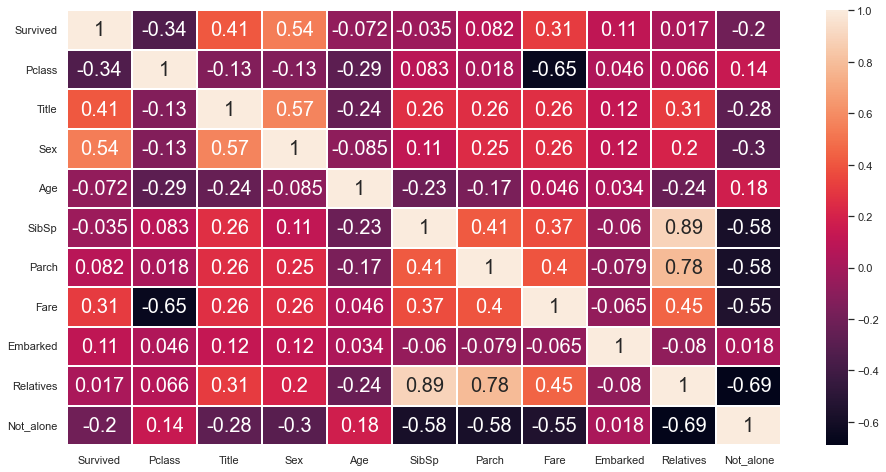

In [144]:
plt.figure(figsize=(16,8))
sns.heatmap(df.corr(), annot=True,cmap = "rocket",linewidths=2,linecolor = "white",cbar=True,annot_kws={"size":20})
plt.show();

<h1 style="color:Black;font-size:18px;font-family:Helvetica;text-align:left;">📝Observations:-</h1>
<p style="color:Black;font-size:16px;font-family:Georgia;text-align:left;">
1. Features Not_alone, SibSp, Age, Pclass have a negative relation with feature Survived. <br>
2. There is a multicollinearity issue with SibSp, Parch and Relatives.<br>
</p>

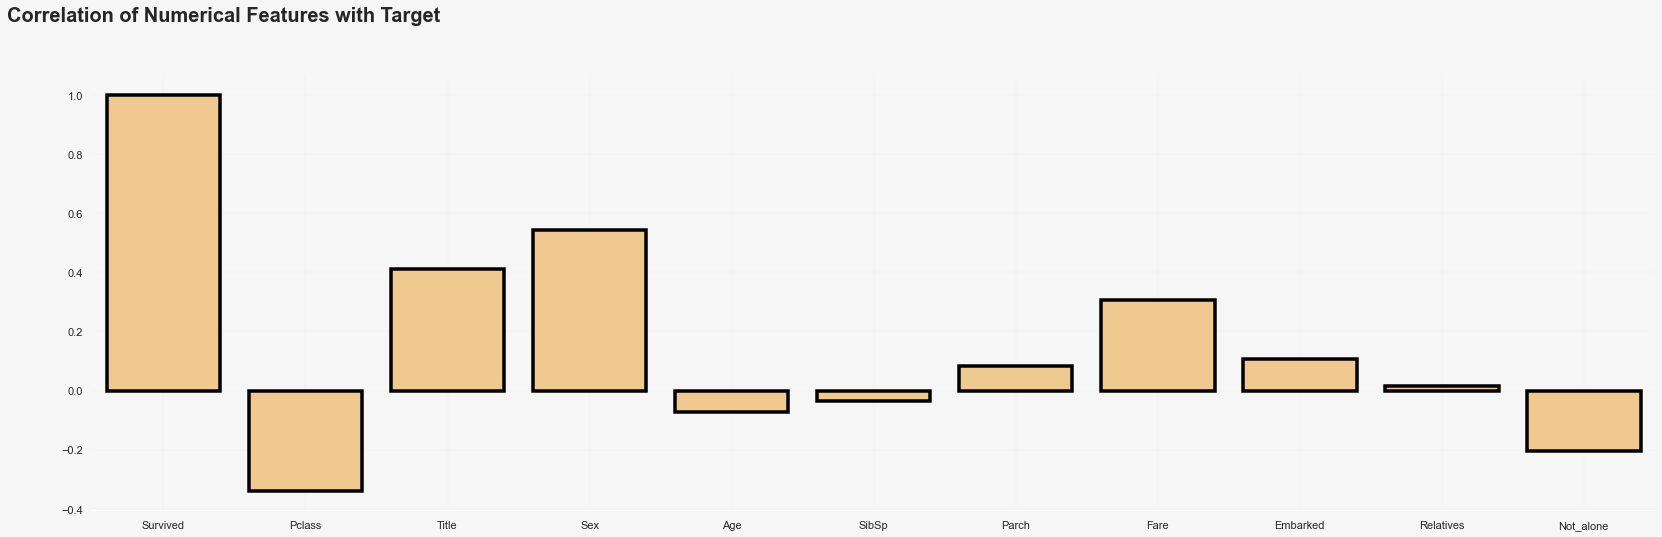

In [145]:
background_color = "#f6f6f6"

fig = plt.figure(figsize=(28,8), facecolor=background_color)
gs = fig.add_gridspec(1, 1)
ax0 = fig.add_subplot(gs[0, 0])
ax0.set_facecolor(background_color)
ax0.text(-1.1, 1.25, 'Correlation of Numerical Features with Target', fontsize=20, fontweight='bold')

chart_df = pd.DataFrame(df.corrwith(df['Survived']))
chart_df.columns = ['corr']
sns.barplot(x=chart_df.index, y=chart_df['corr'], ax=ax0, color='#ffcc80', zorder=3, edgecolor='black', linewidth=3.5)
ax0.grid(which='major', axis='x', zorder=0, color='#EEEEEE', linewidth=0.4)
ax0.grid(which='major', axis='y', zorder=0, color='#EEEEEE', linewidth=0.4)
ax0.set_ylabel('')

for s in ["top","right", 'left']:
    ax0.spines[s].set_visible(False)

plt.show();


In [146]:
#Dropping the redundant and unuseful columns...
#Pclass, age and Sibsp features have a negative correlation with the tafget feature Survived.  
#Ticket attribute has 681 unique tickets and will be a bit tricky to tranform into useful categories that will provide value to our predictions. df.drop(columns = ['Pclass','Age','SibSp','Not_alone','Ticket'],axis = 1,inplace = True)
df.drop(columns = ['Pclass','Age','SibSp','Not_alone','Ticket',],axis = 1,inplace = True)

<a id="13"></a>
<h1 style="color:Black;font-size:28px;font-family:Helvetica;text-align:left;"><u>13. Balancing The Dataset</u></h1>
<p style="color:Black;font-size:16px;font-family:Georgia;text-align:left;">
Remember during the data exploration process we mentioned about balancing the dataset. The below code will take care of that.    
</p>

In [147]:
#Using oversampling technique to try and balance the dataset...

from sklearn.utils import resample

#Separate majority and minority classes
df_majority = df[df.Survived==0]
df_minority = df[df.Survived==1]
 
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=549) 
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

print(df_upsampled['Survived'].value_counts())

0    549
1    549
Name: Survived, dtype: int64


In [148]:
colors = px.colors.sequential.Oryel
fig = make_subplots(rows=1,cols=2,
                    subplot_titles=('Countplot',
                                    'Percentages'),
                    specs=[[{"type": "xy"},
                            {'type':'domain'}]])
a=fig.add_trace(go.Bar(y = df_upsampled['Survived'].value_counts().values.tolist(), 
                      x = df_upsampled['Survived'].value_counts().index, 
                      text=df_upsampled['Survived'].value_counts().values.tolist(),
              textfont=dict(size=15),
                      textposition = 'outside',
                      showlegend=False,
              marker = dict(color = colors,
                            line_color = 'black',
                            line_width=3)),row = 1,col = 1)

b=fig.add_trace((go.Pie(labels=df_upsampled['Survived'].value_counts().keys(),
                             values=df_upsampled['Survived'].value_counts().values,textfont = dict(size = 16),
                     hole = .4,
                     marker=dict(colors=colors,
                            line_color = 'black',
                            line_width=3),
                     textinfo='label+percent',
                     hoverinfo='label')), row = 1, col = 2)
#Changing plot & figure background 
fig.update_layout(
                    paper_bgcolor= '#ffffff',
                    plot_bgcolor= '#ffffff',
                    title=dict(text = "Survived Feature After Balancing",x=0.5,y=0.95),
                    title_font_size=28,font_family="Helvetica"
                  )

In [149]:
#Rearrangement of the columns
df = df_upsampled[['Title', 'Sex', 'Parch', 'Fare', 'Embarked',
       'Relatives','Survived']]
df.head().style.background_gradient(cmap='rocket')

In [150]:
#Feature Variables
x = df.drop('Survived',axis=1)
#Target Variable
Y = df['Survived']

x_train,x_test,Y_train,Y_test = train_test_split(x,Y,test_size = 0.25,random_state=44)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1098 entries, 0 to 25
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Title      1098 non-null   int64
 1   Sex        1098 non-null   int64
 2   Parch      1098 non-null   int64
 3   Fare       1098 non-null   int32
 4   Embarked   1098 non-null   int64
 5   Relatives  1098 non-null   int64
 6   Survived   1098 non-null   int64
dtypes: int32(1), int64(6)
memory usage: 64.3 KB


<a id="14"></a>
<h1 style="color:Black;font-size:28px;font-family:Helvetica;text-align:left;"><u>14. Model Building</u></h1>
<p style="color:Black;font-size:16px;font-family:Georgia;text-align:left;">
There are many machine learning algorithms, however they can be reduced to four categories: classification, regression, clustering, or dimensionality reduction, depending on your target variable and data modeling goals. We will focus on classification and regression. We can generalize that a continuous target variable requires a regression algorithm and a discrete target variable requires a classification algorithm. One side note, logistic regression, while it has regression in the name, is really a classification algorithm. Since our problem is predicting if a passenger survived or did not survive, this is a discrete target variable.With these two criteria - Supervised Learning plus Classification and Regression, we can narrow down our choice of models to a few. These include:<br></p>
    
    1. AdaBoost
    2. Gradient Boosting
    3. Random Forest
    4. Extra Tree
       Extra Tree is a meta estimator that fits a number of randomized decision trees on various sub-samples of 
       the dataset and then uses averaging method to improve the predictive accuracy and control over-fitting.
    5. Decision Tree
    6. XGBoost 
    
 <p style="color:Black;font-size:16px;font-family:Georgia;text-align:left;">We will use cross validation and scoring metrics, discussed in later sections, to rank and compare our algorithms’ performance.
 </p>

Text(0.5, 0, 'Mean Accuracy')

<Figure size 864x576 with 0 Axes>

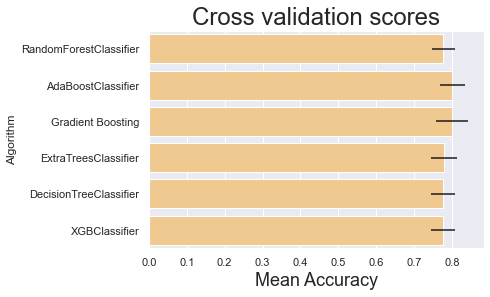

<Figure size 864x576 with 0 Axes>

In [151]:
#Stratified kfold cross validation is an extension of regular kfold cross validation 
#but specifically for classification problems where rather than the splits being completely random, 
#the ratio between the target classes is the same in each fold as it is in the full dataset.
# =============================================================================
# Cross validation on different sets of algorithms!!!
# =============================================================================

kfold = StratifiedKFold(n_splits=8,shuffle=True, random_state=42)

rs = 15
clrs = []

clrs.append(RandomForestClassifier(random_state=rs))
clrs.append(AdaBoostClassifier(random_state=rs))
clrs.append(GradientBoostingClassifier(random_state=rs))
clrs.append(ExtraTreesClassifier(random_state = rs))
clrs.append(DecisionTreeClassifier(random_state = rs))
clrs.append(XGBClassifier(random_state = rs))

cv_results = []
for clr in clrs :
    cv_results.append(cross_val_score(clr, x_train, Y_train , scoring = 'accuracy', cv = kfold, n_jobs=-1))

cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())
    
cv_df = pd.DataFrame({"Algorithm":["RandomForestClassifier","AdaBoostClassifier","Gradient Boosting",
                                   'ExtraTreesClassifier','DecisionTreeClassifier','XGBClassifier'],
                      "CrossVal_Score_Means":cv_means,"CrossValerrors": cv_std,})
g = sns.barplot("CrossVal_Score_Means","Algorithm",data = cv_df,orient = "h",**{'xerr':cv_std},color = '#ffcc80')
g.set_xlabel("Mean Accuracy",fontsize = 18)
g = g.set_title("Cross validation scores",fontsize = 24)
cv_df.style.background_gradient(cmap='rocket')
plt.figure(figsize = (12, 8))
plt.show()

<p style="color:Black;font-size:16px;font-family:Georgia;text-align:left;">Based on the cross validation mean accuracy scores and cross validation errors(standard deviation is ± of our mean score and accuracy score of our model can deviate by this value), Adaboost seems to be performing better closely followed by Random forest. As a next step, lets tune the hyperparameter and retrain the model to see if it improves the performance. It's important we use a different subset for train data to build our model and test data to evaluate our model. Otherwise, our model will be overfitted. Meaning it's great at "predicting" data it's already seen, but not so good at predicting data it has not seen.<br>CV is basically a shortcut to split and score our model multiple times, so we can get an idea of how well it will perform on unseen data. It’s a little more expensive in computer processing, but it's important so we don't gain false confidence.<br>
Also something to be noted, the results may vary during reproduction given the stochastic nature of all these classifier algorithms or evaluation procedure, or differences in numerical precision. 
</p>     

<h1 style="color:Black;font-size:18px;font-family:Helvetica;text-align:left;"><strong><u>How Does AdaBoost Work?</u></strong></h1>

<p style="color:Black;font-size:16px;font-family:Georgia;text-align:left;">
First, let us discuss how boosting works. It makes ‘n’ number of decision trees during the data training period. As the first decision tree/model is made, the incorrectly classified record in the first model is given priority. Only these records are sent as input for the second model. The process goes on until we specify a number of base learners we want to create. Remember, repetition of records is allowed with all boosting techniques.</p>

![Adaboost.JPG](https://lh6.googleusercontent.com/utPRfDjdEtmsPmYOigGx_YJQJ33WDtEYItbBe4SG9wsL7a7zhvmTyIAMC9mJXboR-0JAd3ApKpSllyuknomRpWKlwGzqVnaAzpMtMiCRJmMx16eJoBjeH8AEalfWR8jWiUigrNh9)

<p style="color:Black;font-size:16px;font-family:Georgia;text-align:left;">
This figure shows how the first model is made and errors from the first model are noted by the algorithm. The record which is incorrectly classified is used as input for the next model. This process is repeated until the specified condition is met. As you can see in the figure, there are ‘n’ number of models made by taking the errors from the previous model. This is how boosting works. The models 1,2, 3,…, N are individual models that can be known as decision trees. All types of boosting models work on the same principle.</p> 

<a id="15"></a>
<h1 style="color:Black;font-size:28px;font-family:Helvetica;text-align:left;"><u>15. Hyper Parameter Tunning</u></h1>
<p style="color:Black;font-size:16px;font-family:Georgia;text-align:left;">
Within most machine learning algorithm exist a number of parameters that together can be fine tuned to produce the most accurate prediction on a given dataset. This is essentially what Hyperparamter tuning is - finding the best parameters for your model. The best way to achieve this, while computationally expensive, is to use a GridSearchCV.</p>
<p style="color:Black;font-size:16px;font-family:Georgia;text-align:left;">
GridSearchCV is an exhaustive search over specified parameter values for an estimator, in order to find the values for optimum model performance. Each model has its own parameter's, so the Grid Search needs to be specific for each model. Below, I will complete a GridSearchCV for the Adaboost model, specifying search ranges for the models most important parameters, in order to find the one's that yield the highest accuracy score for the Titanic train set.</p>

In [152]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train, Y_train)
Y_pred = dtc.predict(x_test)

print('------------')
print(confusion_matrix(Y_test, Y_pred))
print('------------')
print('------------------------------------------------------')
print(f'Accuracy Score: {accuracy_score(Y_test, Y_pred)}')
print('------------------------------------------------------')
print('------------------------------------------------------')
print(classification_report(Y_test, Y_pred))
print('------------------------------------------------------')

DecisionTreeClassifier()

------------
[[123  21]
 [ 30 101]]
------------
------------------------------------------------------
Accuracy Score: 0.8145454545454546
------------------------------------------------------
------------------------------------------------------
              precision    recall  f1-score   support

           0       0.80      0.85      0.83       144
           1       0.83      0.77      0.80       131

    accuracy                           0.81       275
   macro avg       0.82      0.81      0.81       275
weighted avg       0.82      0.81      0.81       275

------------------------------------------------------


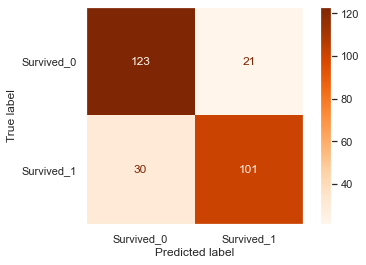

In [153]:
#Plotting just for proper visualization, Adaboost is our selected model 
plot_confusion_matrix(dtc,
                      x_test, Y_test,
                      cmap=plt.cm.Oranges,
                      display_labels = ['Survived_0','Survived_1'])
plt.grid(False)
plt.show();

<p style="color:Black;font-size:16px;font-family:Georgia;text-align:left;">
The number of weak learners is controlled by the parameter n_estimators. The learning_rate parameter controls the contribution of the weak learners in the final combination. By default, weak learners are decision stumps. Different weak learners can be specified through the base_estimator parameter. The main parameters to tune to obtain good results are n_estimators and the complexity of the base estimators (e.g., its depth max_depth or minimum required number of samples to consider a split min_samples_split). 

<p style="color:Black;font-size:16px;font-family:Georgia;text-align:left;">
AdaBoost takes Decision Tree as its learner model by default. Few important parameters of AdaBoost are:</p>
    
*  base_estimator: It is a weak learner used to train the model.
*  n_estimators: Number of weak learners to train in each iteration.
*  learning_rate: It contributes to the weights of weak learners. It uses 1 as a default value.

In [154]:
adc = AdaBoostClassifier(base_estimator = dtc)

parameters = {
    "algorithm" : ['SAMME', 'SAMME.R'],
    "learning_rate" : [0.001, 0.01, 0.1, 1],
    "n_estimators" : [50, 70, 90, 120, 180]
}

grid_search = GridSearchCV(adc, parameters, n_jobs = -1, cv = 10, verbose = 1)
grid_search.fit(x_train, Y_train)

Fitting 10 folds for each of 40 candidates, totalling 400 fits


GridSearchCV(cv=10,
             estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier()),
             n_jobs=-1,
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.001, 0.01, 0.1, 1],
                         'n_estimators': [50, 70, 90, 120, 180]},
             verbose=1)

In [155]:
#simple performance reporting 
print('--------------------------------------------------------------------------------')
print(f'Best parameters {grid_search.best_params_}')
print(
    f'Mean cross-validated accuracy score of the best_estimator: '+ \
    f'{grid_search.best_score_:.3f}'
)
print('--------------------------------------------------------------------------------')

--------------------------------------------------------------------------------
Best parameters {'algorithm': 'SAMME.R', 'learning_rate': 0.1, 'n_estimators': 180}
Mean cross-validated accuracy score of the best_estimator: 0.801
--------------------------------------------------------------------------------


<a id="16"></a>
<h1 style="color:Black;font-size:28px;font-family:Helvetica;text-align:left;"><u>16. Train Model after Tunning</u></h1>

In [164]:
adc = AdaBoostClassifier(base_estimator = dtc, algorithm = 'SAMME', learning_rate = 0.1, n_estimators = 70)
adc.fit(x_train, Y_train)
Y_pred = adc.predict(x_test)

AdaBoostClassifier(algorithm='SAMME', base_estimator=DecisionTreeClassifier(),
                   learning_rate=0.1, n_estimators=70)

<a id="17"></a>
<h1 style="color:Black;font-size:28px;font-family:Helvetica;text-align:left;"><u>17. Feature Importance</u></h1>
<p style="color:Black;font-size:16px;font-family:Georgia;text-align:left;">
AdaBoost's feature importance is derived from the feature importance provided by its base classifier. If I am using Decision Tree as a base classifier, then the AdaBoost feature importance is determined by the average feature importance provided by each Decision Tree.</p>
<p style="color:Black;font-size:16px;font-family:Georgia;text-align:left;">
The difference between the AdaBoost and for example a Random Forest (forest of tree's) that might influence determination of feature importance is in how they produce variants of the base classifier. The former produces variants with an increased focus on the "difficult" examples and the latter produces variants by introducing randomness in the tree building process.</p> 

In [165]:
feature = pd.Series(adc.feature_importances_, index = x_train.columns).sort_values(ascending = False)
print(feature)

Relatives    0.255213
Sex          0.200123
Fare         0.198106
Title        0.171928
Embarked     0.097069
Parch        0.077561
dtype: float64


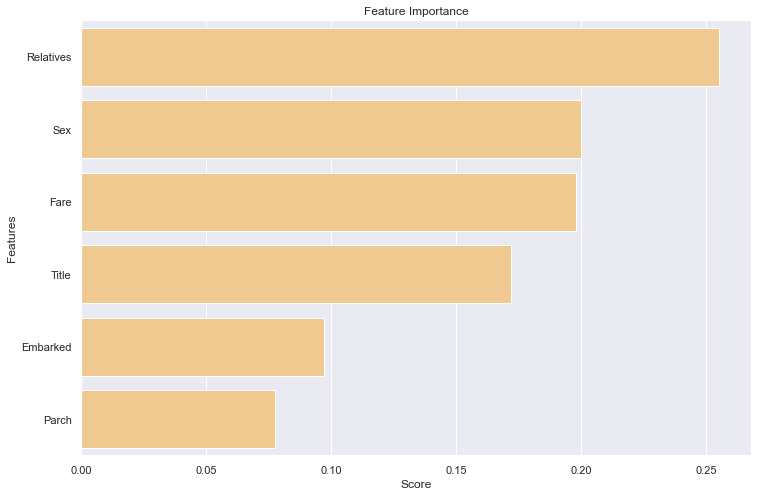

In [166]:
plt.figure(figsize = (12,8))
sns.barplot(x = feature, y = feature.index,color = '#ffcc80')
plt.title("Feature Importance")
plt.xlabel('Score')
plt.ylabel('Features')
plt.show();

<a id="18"></a>
<h1 style="color:Black;font-size:28px;font-family:Helvetica;text-align:left;"><u>18. Model Evaluation</u></h1>
<p style="color:Black;font-size:16px;font-family:Georgia;text-align:left;">We've so far used accuracy score to evaluate our classifiers. But sometimes accuracy score isn't all enough to evaluate a classifier properly as accuracy score doesn't tell exactly which class (positive or negative) is being wrongly classified by our classifier in case of low accuracy score. Again for imbalanced classification problem, accuracy score isn't the best metric to choose between different classifiers. To clarify this, in this section, we will calculate confusion matrix and a classification report that provides precision score, recall score, f1 score information</p>

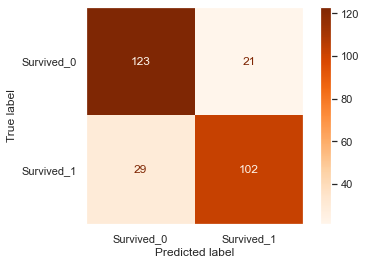

In [167]:
plot_confusion_matrix(adc,
                      x_test, Y_test,
                      cmap=plt.cm.Oranges,
                      display_labels = ['Survived_0','Survived_1'])
plt.grid(False)
plt.show();

<p style="color:Black;font-size:16px;font-family:Georgia;text-align:left;">The confusion matrix shows the number of correct classifications along with misclassifications when a classifier make predictions for each class (positive or negative).<br> The diagonal elements are correct classification while the off diagonal elements are missclassifications. Some basic terms associated with confusion matrix:</p>

   1. True positives (TP): These are cases in which we predicted 1(yes), and the actual is also 1(yes).
   2. True negatives (TN): We predicted 0(no), and the actual is also 0(no).
   3. False positives (FP): We predicted 1(yes), but the actual is 0(no). (Also known as a "Type I error.")
   4. False negatives (FN): We predicted 0(no), but the actual is 1(yes). (Also known as a "Type II error.")

<h1 style="color:Black;font-size:18px;font-family:Helvetica;text-align:left;">📝Observations:-</h1>
<p style="color:Black;font-size:16px;font-family:Georgia;text-align:left;">
    1. The first row is about the not-survived-predictions: 123 passengers were correctly classified as 
       not survived(called true negatives) and 21 where wrongly classified as not survived(false positives).<br>
    2. The second row is about the survived-predictions: 29 passengers were wrongly classified as 
       survived(false negatives) and 102 were correctly classified as survived(true positives).
</p>
Please note although I have set the random state parameter, observed numbers may change very slighty when reproducing the results. 

<p style="color:Black;font-size:16px;font-family:Georgia;text-align:left;">Precision Score<br>
Precision is the ratio of true positive to total predicted positive(true positive + false positive). So precision score tells how many true positives our model can capture out of total predicted positives.<br>
<p style="color:Black;font-size:16px;font-family:Georgia;text-align:left;">Recall (or Sensitivity or True Positive Rate)<br>
Recall is the ratio of true positive to total actual positive(true positive + false negative). So recall score basically calculates true positives from total actual positives.<br>
<p style="color:Black;font-size:16px;font-family:Georgia;text-align:left;">F1 Score<br>
We can't choose classifiers solely depending on their precision or recall score. Rather we need to consider both to find out the best classifiers. Here comes the f1 score which is the balanced harmonic mean of Recall and Precision, giving both metrics equal weight. The higher the f1 score is, the better.<br>
<p style="color:Black;font-size:16px;font-family:Georgia;text-align:left;">Classification Report<br> 
Precision, recall, and f1 score is only associated with true positives. But what if we want to measure true negatives? We can measure them with true positives and count of each class (0 and 1) in a classification report. It provides precision, recall, f1 score and class count altogether for both classs (0 and 1) but at the cost of less hassle.
</p>

In [168]:
print('------------------------------------------------------')
print(f'Accuracy Score: {accuracy_score(Y_test, Y_pred)}')
print('------------------------------------------------------')
print('------------------------------------------------------')
print(classification_report(Y_test, Y_pred))
print('------------------------------------------------------')

------------------------------------------------------
Accuracy Score: 0.8181818181818182
------------------------------------------------------
------------------------------------------------------
              precision    recall  f1-score   support

           0       0.81      0.85      0.83       144
           1       0.83      0.78      0.80       131

    accuracy                           0.82       275
   macro avg       0.82      0.82      0.82       275
weighted avg       0.82      0.82      0.82       275

------------------------------------------------------


<p style="color:Black;font-size:16px;font-family:Georgia;text-align:left;"><b>Interpretation</b><br>

<p style="color:Black;font-size:16px;font-family:Georgia;text-align:left;">Accuracy<br>
82% of the model's predictions are correct.

<p style="color:Black;font-size:16px;font-family:Georgia;text-align:left;">Precision<br>
Precision is measure of how precise the model's predictions are. When the model predicts a passenger survived, that person actually did survive 82% of the time.

<p style="color:Black;font-size:16px;font-family:Georgia;text-align:left;">Recall (Sensitivity)<br>
If there a passenger that survived is present in the test set, the model is able to identify (recall) it 82% of the time.

<p style="color:Black;font-size:16px;font-family:Georgia;text-align:left;">F1 Score<br>
F1 Score is the best of both worlds as it is a weighted average of precision and recall. An F1 Score of 82% means that 82% of the time: </p>

*     when the model predicts someone survived, you can be confident that person actually did survive and it is not a false alarm.
*     when there is a actual surivior in the dataset, the model is able to detect it In classification problems where there are 
      more than two labels that apply, accuracy is less intuitive and the F1 Score is a better measure of a model's performance.

<p style="color:Black;font-size:16px;font-family:Georgia;text-align:left;"><b>ROC Curve</b><br>
Another way to evaluate and compare binary classifiers is the ROC AUC Curve. This curve plots the true positive rate (also called recall) against the false positive rate (ratio of incorrectly classified negative instances).The classifier will (hopefully) identify some examples as true and some as false. Some of these predicted true examples actually are true. The percentage of known true examples that the model identifies as true is the True Positive Rate (TPR). Similarly, the False Positive Rate (FPR) is the percentage of known false examples that the model identifies as true. We clearly want TPR to be 1.0 and FPR to be 0.0, as that would be a perfect classifier. 

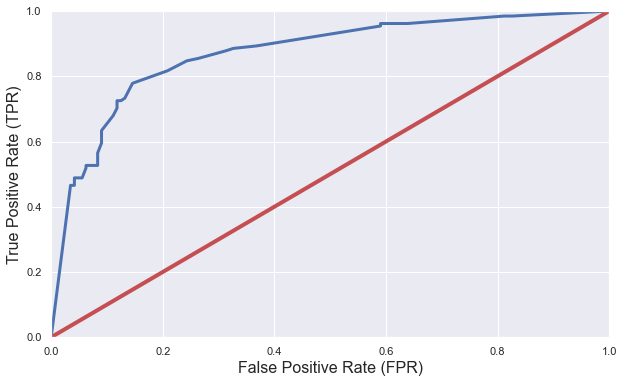

In [169]:
y_score = adc.predict_proba(x_test)
y_score = y_score[:,1]
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, y_score)

# Plotting them against each other
def plot_roc_curve(false_positive_rate, true_positive_rate, label=None):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=3, label=label)
    plt.plot([0, 1], [0, 1], 'r', linewidth=4)
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (FPR)', fontsize=16)
    plt.ylabel('True Positive Rate (TPR)', fontsize=16)

plt.figure(figsize=(10, 6))
plot_roc_curve(false_positive_rate, true_positive_rate)
plt.show();

<p style="color:Black;font-size:16px;font-family:Georgia;text-align:left;"><b>ROC AUC Score</b><br>
The ROC AUC Score is the corresponding score to the ROC AUC Curve. It is simply computed by measuring the area under the curve, which is called AUC.
A classifier that is 100% correct would have a ROC AUC Score of 1, and a completely random classifier would have a score of 0.5.Technically, it’s the probability that a randomly selected positive example will be scored higher by the classifier than a randomly selected negative example. If you’ve got two models with nearly identical overall accuracy, but one has a higher AUC… it’s may be best to go with the higher AUC. Lets check the score for our classifier

In [170]:
r_auc_scr = roc_auc_score(Y_test, y_score)
print("ROC AUC Score:", r_auc_scr)

ROC AUC Score: 0.8705205682782018


<p style="color:Black;font-size:16px;font-family:Georgia;text-align:left;"><b>Result: </b>After running the model couple of 100 times I would say the selected model accurately predicts with 80% to 82% on an average.As per data analysis we have seen that females fared better than males(features title and sex). Priority was given to families(relatives) and people who paid more for ticket(fare price) also did better. This is shown in the feature importance plot from our model. Overall our model predicted the survival fairly well based on the available data and confirms to our analysis.        

<a id="19"></a>
<h1 style="color:Black;font-size:28px;font-family:Helvetica;text-align:left;"><u>19. Discussion & Conclusion</u></h1>
<p style="color:Black;font-size:16px;font-family:Georgia;text-align:left;">    
Summary:<br>
I started this project by collecting and cleaning data followed by statistical and exploratory data analysis (EDA), using seaborn and matplotlib libraries to create visualizations, check missing data, learn which features are important, and better understand the dataset. During feature engineering and data processing, I computed missing values, converted features into numeric ones, grouped values into categories, and created new features. After data preprocessing, I trained 6 different machine learning models, picked the best one(Adaboost) based on the cross validation mean accuracy scores. Then, I briefly discussed how selected model (Adaboost) works and tuned its performance through hyperparameter optimization. I retrained the model after tunning and than evaluated the performance by reviewing the Confusion Matrix, accuracy score and classfication report that consisted of various metrics such as precision, recall, F1-score followed by review of the ROC curve and AUC score.</p>

<p style="color:Black;font-size:16px;font-family:Georgia;text-align:left;">
Learnings, takeaways & Improvement:<br> 
Auto EDA such as panda profile report, can significantly reduce the time spent on analysis and if used along with manual analysis can be a very efficient tool to understand relationship between features and may reduce the number of iterations required during model building and validation.    
Do not expect the GridSearchCV to improve your results greatly. It may be more efficient to go back and explore your selected features or find other relationships between features to improve your model performance.</p>

<p style="color:Black;font-size:16px;font-family:Georgia;text-align:left;">
There is still room for improvement, like doing a more extensive feature engineering, by comparing and plotting the features against each other and identifying and removing the noisy features. Another thing that can improve the overall result would be a more extensive hyperparameter tuning on several machine learning models and than pick the best model for performance evaluation. I could also probably try some automated machine learning libraries.</p>

<p style="color:Black;font-size:16px;font-family:Georgia;text-align:left;">
Finally, I learned valuable concepts that can be transferable to other projects. It significantly helped me understand the machine learning workflow and strengthened my problem-solving and analytical skills. I was able to practice and apply concepts learned from textbooks, articles, classroom, and various other sources, on a challenging problem.
</p>


<h1 style="color:Black;font-size:16px;font-family:Helvetica;text-align:left;">Link to my Github project</h1> 

[Github](https://github.com/visi2021/Machine-Learning)